# Eigenstates for 2x2x2 lattices.

Check the basis lattices and their influence for 2x2x4 lattices. Data is stored in `../python_data/eigenstates_analysis/`.

All these checks are done for bosons.

In [3]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append('../python_gauss_lattice/')
from gauss_lattice import HamiltonianBuilder
from gauss_lattice.aux import size_tag, winding_tag, read_all_states

data_dir = '../python_data/eigenstates_analysis/'

In [26]:
param = {
    'L' : [2,2,2],
    'lambda' : -100,
    'gauge_particles' : 'bosons'
}
tag = '_' + param['gauge_particles'] + '_' + size_tag(param['L']) + '_lam{:.2f}.dat'.format(param['lambda'])
eigenstates = np.load(data_dir+'eigenstates'+tag+'.npy')

lattices = np.array(read_all_states(param['L'], basedir='../python_data/local_state_storage/'))
builder = HamiltonianBuilder(param, states=lattices)

[15:21:26] Setting up the Hamiltonian with 9600 Fock states.


### Find the dominant eigen-lattices.

In [27]:
def get_squeezed_eigenstate(full_estate, threshold=1e-2):
    """ Takes in an eigenstate (as a 1D numpy-array) and returns
        the leading contributions, i.e., the ones larger in magnitude
        than the threshold.
        Also returns the appropriate indicies.
    """
    ses = full_estate[np.abs(full_estate) >= threshold].flatten()
    i = np.argwhere(np.abs(full_estate) >= threshold)
    return ses, i
    
    
# Empirically found thresholds.
thresholds = {
    -5 : 5e-5,
    -10 : 2e-2,
    -50 : 5e-6,
    -100 : 5e-3
}

ses = np.zeros(shape=(12,12))
for i in range(12):
    ses[:,i] = get_squeezed_eigenstate(eigenstates[:,i], threshold=thresholds[param['lambda']])[0]
    
# np.save('../python_symmetry/eigenstates{:s}.npy'.format(tag).replace('.dat', ''), ses)

12
12
12
12
12
12
12
12
12
12
12
12
[[147 155 262 289 362 389 490 517 590 617 724 732]]
[ 184365  185396  587348  665209  709938 1049417 1103700 1181561 1233764
 1582491 1729853 1749280]


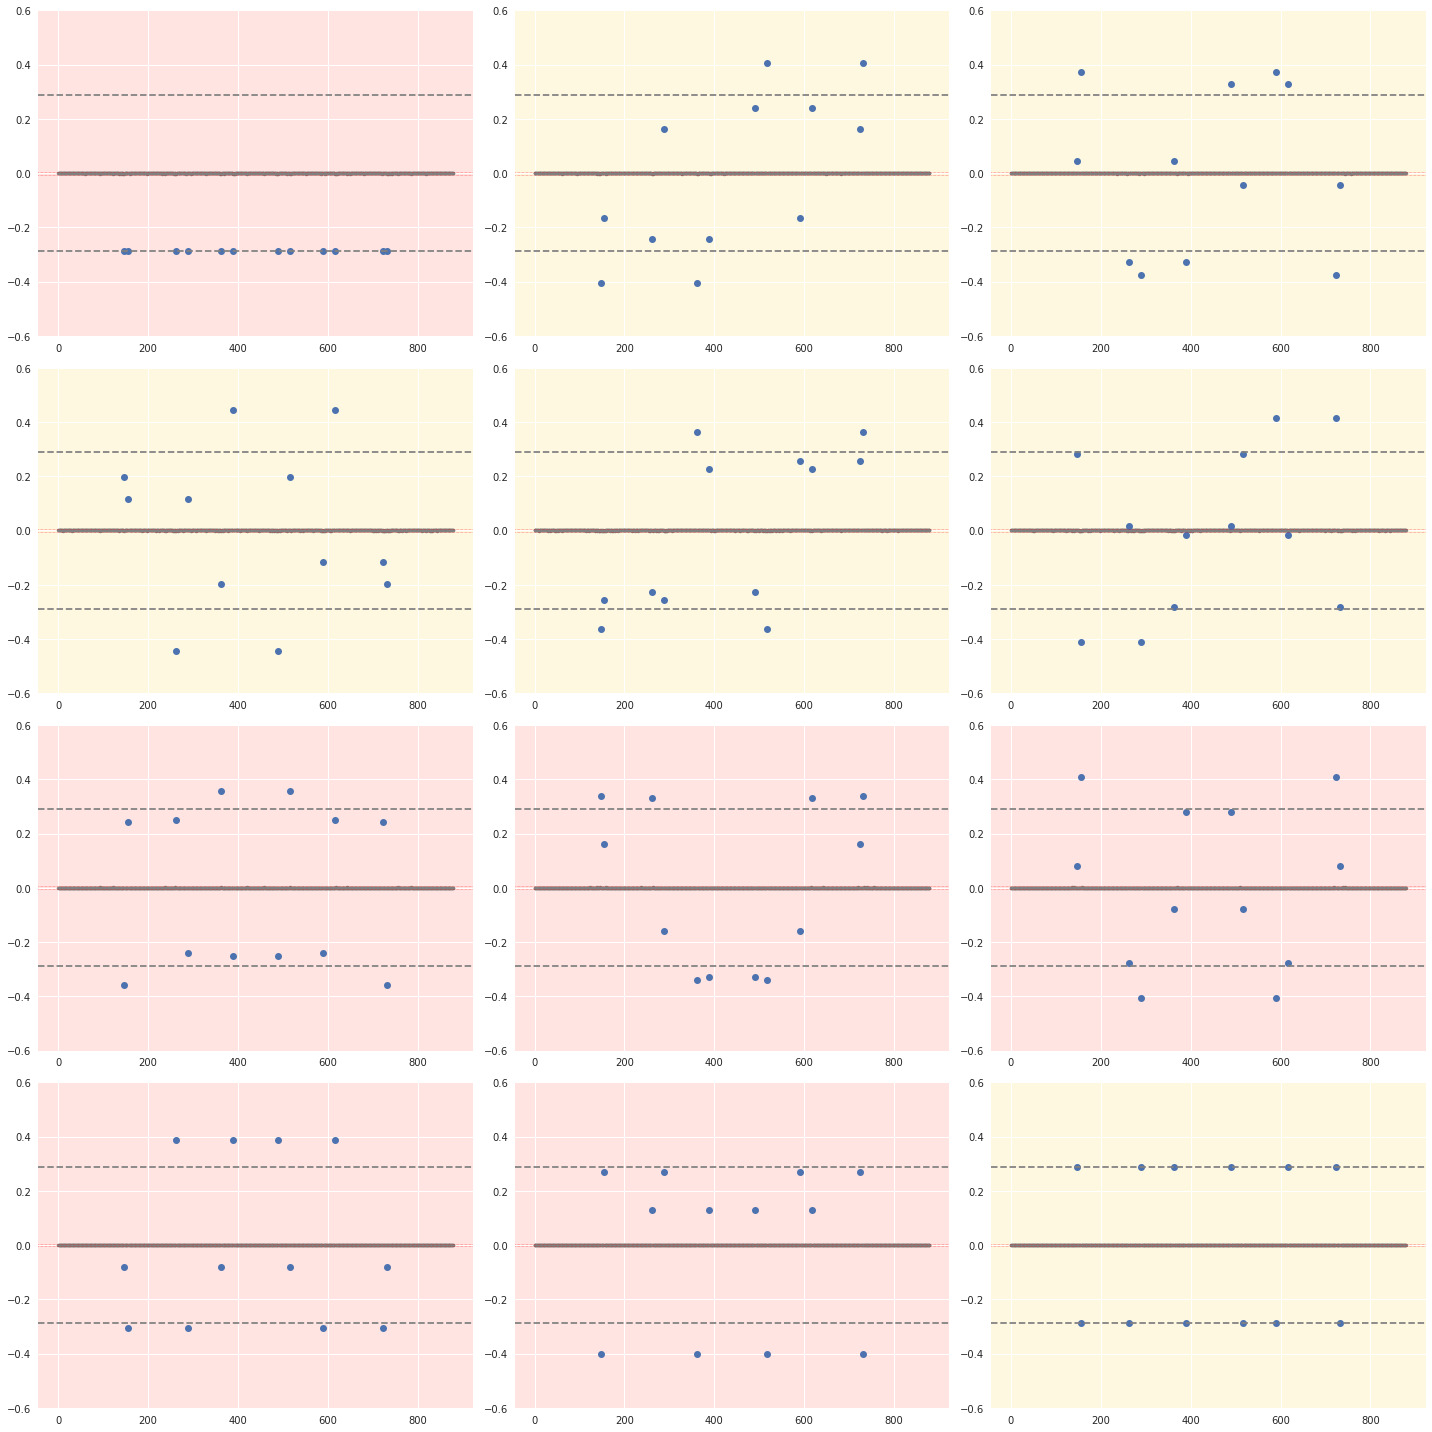

In [28]:
with plt.style.context('seaborn'):
    fig, ax = plt.subplots(4,3)
    fig.set_size_inches(20, 20)
    ax = ax.flatten()
    
    for i, estate in enumerate(range(12)):
        ses = get_squeezed_eigenstate(eigenstates[:,estate], threshold=thresholds[param['lambda']])
        print(len(ses[0]))
        ax[i].plot(eigenstates[:,estate], ls='', marker='.', color='gray', alpha=12)
        ax[i].plot(ses[1], ses[0], ls='', marker='o')
        
        ax[i].axhline(thresholds[param['lambda']], ls=':', color='red', lw=0.5)
        ax[i].axhline(-thresholds[param['lambda']], ls=':', color='red', lw=0.5)
        
        ax[i].axhline(np.sqrt(1/12), ls='--', color='gray', marker='')
        ax[i].axhline(-np.sqrt(1/12), ls='--', color='gray', marker='')
        
        # The lattices are organized such, that the reversing the order corresponds
        # to a charge conjugation, i.e., occupied links become unoccupied and vice versa.
        # (in the spin picture: all directions are flipped).
        # We can use this to check the parity under this transformation.
        
        atol = 1e-5
        if np.allclose(ses[0][::-1], ses[0], atol=atol):
            ax[i].set_facecolor((1.0, 0.47, 0.42, 0.2))
        elif np.allclose(ses[0][::-1], -ses[0], atol=atol):
            ax[i].set_facecolor((1.0, 0.87, 0.42, 0.2))
            
        ext = 0.6
        ax[i].set_ylim(-ext, ext)
#         ax[i].set_yscale('log')
    
#     ax[0,0].set_yscale('log')
#     ax[0,1].set_yscale('log')

print(np.argwhere(np.abs(eigenstates[:,estate]) >= thresholds[param['lambda']]).T)
contributions = np.array(builder.lookup_table)[np.argwhere(np.abs(eigenstates[:,estate]) >= thresholds[param['lambda']]).flatten()]
print(contributions)

fig.tight_layout()
# fig.savefig('parity_states_lambda-100.pdf')